### Statistics for Data Scientist
# Impact of Major Brexit Events on Various Financial Markets

<hr>

For further details visit our GitHub Repository: https://github.com/achmand/datascience-brexit

## Introduction

In [1]:
################################################################################################################
# Show setup info and source utility script (holds constants and utility functions)
################################################################################################################
options(warn=-1) # suppress warnings
#options(warn=0) # show warnings

# show session info 
sessionInfo()

# uncomment to show availble R packages 
#library()

# source utility script 
source("miscellaneous.R") 

# set up libraries 
lubripack("knitr",      # for pretty display for dataframes
          "IRdisplay",  # for pretty display for dataframes
          "kableExtra", # for pretty display for dataframes 
          "e1071",      # to compute skewness and kurtosis
          "broom",      # to convert dataframe summary to df easily
          "dplyr",      # for data manipulation
          "ggplot2",    # for plotting graphs
          "ggpubr",     # for visualisations
          "repr")       # for visualisations

R version 3.5.1 (2018-07-02)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.1 LTS

Matrix products: default
BLAS/LAPACK: /home/delinvas/anaconda3/envs/r_brexit/lib/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.5.1  magrittr_1.5    IRdisplay_0.5.0 pbdZMQ_0.3-3   
 [5] tools_3.5.1     htmltools_0.3.6 base64enc_0.1-3 crayon_1.3.4   
 [9] Rcpp_1.0.1      uuid_0.1-2      stringi_1.2.4   IRkernel_0.8.12
[13] jsonlite_1.5    stringr_1.3.1   digest_0.6.15   repr_0.15.0    
[17] eva


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Below Packages Successfully Installed:

     knitr  IRdisplay kableExtra      e1071      broom      dplyr    ggplot2 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 
    ggpubr       repr 
      TRUE       TRUE 


In [2]:
################################################################################################################
# Load the cleansed datasets found in the following path: '/data/cleansed'
################################################################################################################

# path where the cleansed data sets are persisted
cleansed_path = "data/cleansed/"

# load dataframes from cleansed datasets
df.events  <- data.frame(read.csv(paste(cleansed_path, kEventsFile, sep=""))) # loads major brexit events 
df.fxrates <- data.frame(read.csv(paste(cleansed_path, kFxRatesFile, sep=""))) # loads fx rates 
df.btcgbp  <- data.frame(read.csv(paste(cleansed_path, kBtcFile, sep=""))) # loads crypto prices (BTC/GBP)
df.ethgbp  <- data.frame(read.csv(paste(cleansed_path, kEthFile, sep=""))) # loads crypto prices (ETH/GBP)
df.ftse100 <- data.frame(read.csv(paste(cleansed_path, kFtse100File, sep=""))) # loads index prices (FTSE100)
df.ftse250 <- data.frame(read.csv(paste(cleansed_path, kFtse250File, sep=""))) # loads index prices (FTSE250)
df.gold    <- data.frame(read.csv(paste(cleansed_path, kXauFile, sep=""))) # loads commodity prices (XAU/GBP)
df.oil     <- data.frame(read.csv(paste(cleansed_path, kOilFile, sep=""))) # loads commodity prices (OIL/GBP)

# convert date variable to actual date type 
df.events$event_date <- as.Date(df.events$event_date) 
df.fxrates$date      <- as.Date(df.fxrates$date) 
df.btcgbp$date       <- as.Date(df.btcgbp$date) 
df.ethgbp$date       <- as.Date(df.ethgbp$date)
df.ftse100$date      <- as.Date(df.ftse100$date)
df.ftse250$date      <- as.Date(df.ftse250$date)
df.gold$date         <- as.Date(df.gold$date)
df.oil$date          <- as.Date(df.oil$date)

# NOTE: any dataframe ending with 'f' means that that dataframe was filtered from some other dataframe 

## Statistical Model (Events Studies - Brexit)

In [48]:
################################################################################################################
# Hyperparameters for our statistical model
################################################################################################################

# hyperparameters 
event.window      <- 3  # 3 days used for the event window (-3 days and +6 days around each event)
estimation.window <- 60 # 60 days used for the estimation period 

## Exploring Datasets 

### Major Brexit Events Extracted from News Agencies 

In [4]:
################################################################################################################
# Explores the major brexit events dataset
################################################################################################################

# first we compute the difference in days between each event 
daysdiff <- diff(df.events$event_date) # compute the difference in days (event_date)
df.events$days_diff <- c(NA, daysdiff) # add another column with days difference 

# display brexit key events dataframe 
print("All Brexit Major Events collected from Associated Press and Al Jazzera")
print(paste("Total Events:", nrow(df.events))) # print total no. of observations
kable(df.events) %>% # styled dataframe 
  kable_styling(full_width = F) %>%
  column_spec(1, bold = T, border_right = T) %>%
  column_spec(2, width = "5em") %>%
  column_spec(3, width = "80em") %>%
  as.character() %>%
  display_html()

[1] "All Brexit Major Events collected from Associated Press and Al Jazzera"
[1] "Total Events: 34"


X,event_date,event_desc,days_diff
1,2013-01-23,Cameron mentions Brexit in speech,NA
2,2015-05-07,British voters elect a majority Conservative government. Then-Prime Minister David Cameron confirms in his victory speech that there will be an in/out referendum on Britain's EU membership.,834
3,2016-02-20,Cameron confirms that he will campaign for Britain to remain in the 28-nation bloc. The referendum date is set for June.,289
4,2016-02-22,Referendum date announced,2
5,2016-06-23,Britain votes 52 per cent to 48 per cent to leave the EU.,122
6,2016-06-24,Cameron says he will resign in light of the results.,1
7,2016-07-13,"Following a Conservative Party leadership contest, May, then Home Secretary, becomes prime minister.",19
8,2016-10-02,"May says that Britain will begin the formal process of leaving the EU by the end of March 2017. In order to do this, the British government would have to invoke Article 50 of the EU's Lisbon Treaty.",81
9,2017-01-17,May sets out plan for Brexit,107
10,2017-02-02,White paper on Brexit,16


In [5]:
################################################################################################################
# Filters major brexit events dataframe by the estimation.window 
################################################################################################################

# we will be filtering out events which do not have 60 days difference between the event dates 
# this is done to accommodate our statistical model
df.eventsf <- df.events[df.events$days_diff >= estimation.window | is.na(df.events$days_diff), ] 

# take only the columns specified
df.eventsf <- df.eventsf[c("event_date", "event_desc", "days_diff")]  
# label each event for better identification 
df.eventsf$event <- paste("event_", seq.int(nrow(df.eventsf)), sep="")
# reorder columns 
df.eventsf <- df.eventsf[c("event_date", "event" ,"event_desc", "days_diff")]  

# display filtered brexit key events dataframe 
print(paste("All Brexit Major Events after filtering with at least", estimation.window, "days difference."))
print(paste("Total Events:", nrow(df.eventsf))) # print total no. of observations
kable(df.eventsf) %>% # styled dataframe 
  kable_styling(full_width = F) %>%
  column_spec(1, bold = T, border_right = T) %>%
  column_spec(2, width = "5em") %>%
  column_spec(3, width = "5em") %>%
  column_spec(4, width = "80em") %>%
  as.character() %>%
  display_html()

[1] "All Brexit Major Events after filtering with at least 60 days difference."
[1] "Total Events: 10"


,event_date,event,event_desc,days_diff
1,2013-01-23,event_1,Cameron mentions Brexit in speech,NA
2,2015-05-07,event_2,British voters elect a majority Conservative government. Then-Prime Minister David Cameron confirms in his victory speech that there will be an in/out referendum on Britain's EU membership.,834
3,2016-02-20,event_3,Cameron confirms that he will campaign for Britain to remain in the 28-nation bloc. The referendum date is set for June.,289
5,2016-06-23,event_4,Britain votes 52 per cent to 48 per cent to leave the EU.,122
8,2016-10-02,event_5,"May says that Britain will begin the formal process of leaving the EU by the end of March 2017. In order to do this, the British government would have to invoke Article 50 of the EU's Lisbon Treaty.",81
9,2017-01-17,event_6,May sets out plan for Brexit,107
15,2017-09-22,event_7,May details Brexit stance on key points,95
16,2018-03-19,event_8,UK and EU agree on several key issues,178
17,2018-07-07,event_9,"May and her Cabinet endorse the so-called Chequers Plan worked out at a fractious session at the prime minister's country retreat. It leads to the resignations of Brexit Secretary David Davis, Foreign Secretary Boris Johnson and others who favour a more complete break with the EU.",110
18,2018-11-14,event_10,Withdrawal agreement published,130


In [6]:
################################################################################################################
# We need to set the event.window for each event in the filtered events dataset  
################################################################################################################

# function to apply event windowing, (tb_n:before event, ta_n:after event)
# this was done so it event window and estimation window could be easily changed 
# by changing the hyperparameters in the previous cell 
event.windowing <- function(eventsdataset, window, estimation) {
    # Applys event windowing to the events dataframe passed.
    #
    # Args:
    #   eventsdataset: Dataframe with the events.
    #   window: The event window applyed around the event (evet_date/t_0).
    #   estimation: The estimation window to be used for estimating values such as expected return.
    #
    # Returns:
    #   Dataframe with the event windowing applyed and also includes the estimation dates for each event.

    # apply event windowing 
    for (t in seq(1:window)) {
        # apply windowing for before the event date (tb_n:before event)
        tmp.before <- (window - t) + 1
        t.before <- paste("tb_", tmp.before, sep="") 
        eventsdataset[t.before] <- eventsdataset$event_date - ((window - t) + 1)
        
        # apply windowing for after the event date (ta_n:after event)
        t.after <- paste("ta_", t, sep="")
        eventsdataset[t.after] <- eventsdataset$event_date + t
    }
    
    # rename event_date to t_0
    eventsdataset$t_0 <- eventsdataset$event_date
    
    # column names for ta_n:before event
    tb.columns <- paste("tb_", rev(seq.int(window)), sep="")
    # column names for tb_n:before event
    ta.columns <- paste("ta_", seq.int(window), sep="")
   
    # compute estimation windows
    eventsdataset["est_start"] <- eventsdataset[tb.columns[1]] - estimation - 1 # estimation window start date
    eventsdataset["est_end"] <- eventsdataset[tb.columns[1]] - 1                # estimation window end date 
    
    #print(eventsdataset["est_end"] - eventsdataset["est_start"])
    
    # concat the column names 
    columns <- c("event", "est_start", "est_end", tb.columns, "t_0", ta.columns)
    
    # reorder columns 
    eventsdataset <- eventsdataset[columns]

    # return events dataframe with event windowing applied 
    return(eventsdataset)
} 

# get events with event windowing 
df.eventswindow <- event.windowing(df.eventsf, event.window, estimation.window)
df.eventswindow

# we need to get the first event's estimation date 
# and the last event's end estimation date as 
# these will be used to filter out the financial datasets
# to apply descriptive stats on 

# get the first row starting estimation date 
global.start <- head(df.eventswindow, 1)$est_start

# we apply N days offset so we dont cut off/filter out the data exactly at the last day
# set offset to 0, if you dont want to offset when filtering financial datasets 
offset <- 10
global.end   <- tail(df.eventswindow, 1)$est_end + (event.window * 2) + 1 + offset

# print these dates
print(paste("We will filter the financial datasets using the following date range:", 
            global.start,
            "to",
            global.end))

,event,est_start,est_end,tb_3,tb_2,tb_1,t_0,ta_1,ta_2,ta_3
1,event_1,2012-11-20,2013-01-19,2013-01-20,2013-01-21,2013-01-22,2013-01-23,2013-01-24,2013-01-25,2013-01-26
2,event_2,2015-03-04,2015-05-03,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-09,2015-05-10
3,event_3,2015-12-18,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-20,2016-02-21,2016-02-22,2016-02-23
5,event_4,2016-04-20,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26
8,event_5,2016-07-30,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05
9,event_6,2016-11-14,2017-01-13,2017-01-14,2017-01-15,2017-01-16,2017-01-17,2017-01-18,2017-01-19,2017-01-20
15,event_7,2017-07-20,2017-09-18,2017-09-19,2017-09-20,2017-09-21,2017-09-22,2017-09-23,2017-09-24,2017-09-25
16,event_8,2018-01-14,2018-03-15,2018-03-16,2018-03-17,2018-03-18,2018-03-19,2018-03-20,2018-03-21,2018-03-22
17,event_9,2018-05-04,2018-07-03,2018-07-04,2018-07-05,2018-07-06,2018-07-07,2018-07-08,2018-07-09,2018-07-10
18,event_10,2018-09-11,2018-11-10,2018-11-11,2018-11-12,2018-11-13,2018-11-14,2018-11-15,2018-11-16,2018-11-17


[1] "We will filter the financial datasets using the following date range: 2012-11-20 to 2018-11-27"


### Financial Markets Dataset Extracted from Various Sources  

In [7]:
################################################################################################################
# Filter out the financial datasets based on the global.start and global.end, so we can apply descriptive 
# analysis on the date window we will be working on when conducting event studies/hypothesis testing
################################################################################################################

# filter out the dataset to be between the range of global.start and global.end 
df.fxratesf <- df.fxrates[(df.fxrates$date >= global.start) & (df.fxrates$date <= global.end), ] # FX Rates
df.btcgbpf  <- df.btcgbp[(df.btcgbp$date >= global.start) & (df.btcgbp$date <= global.end), ]    # BTC/GBP
df.ethgbpf  <- df.ethgbp[(df.ethgbp$date >= global.start) & (df.ethgbp$date <= global.end), ]    # ETH/GBP
df.ftse100f <- df.ftse100[(df.ftse100$date >= global.start) & (df.ftse100$date <= global.end), ] # FTSE100
df.ftse250f <- df.ftse250[(df.ftse250$date >= global.start) & (df.ftse250$date <= global.end), ] # FTSE250
df.goldf    <- df.gold[(df.gold$date >= global.start) & (df.gold$date <= global.end), ]          # XAU/GBP
df.oilf     <- df.oil[(df.oil$date >= global.start) & (df.oil$date <= global.end), ]             # OIL/GBP

# for some reason a new index/rownames is created 
# so we need to remove the previous rownames as they are useless (named as X )
df.fxratesf$X = NULL
df.btcgbpf$X  = NULL
df.ethgbpf$X  = NULL
df.ftse100f$X = NULL
df.ftse250f$X = NULL
df.goldf$X    = NULL
df.oilf$X     = NULL 

# TODO - > WRITE COMMENTS FOR FUNCTION
display.htdf <- function (dataset, n, asset) {
    
    # display head tail for the args passed 
    paste("Showing head and tail", n, "rows for filtered", asset) %>%
      as.character() %>%
      display_html()
    
    # display head 
    kable(head(dataset, n)) %>% # styled dataframe 
      kable_styling(full_width = F) %>%
      as.character() %>%
      display_html()

    # display tail
    kable(tail(dataset, n)) %>% # styled dataframe 
      kable_styling(full_width = F) %>%
      as.character() %>%
      display_html()
}

# print head and tail for each dataset 
print.nrows <- 5
display.htdf(df.fxratesf, print.nrows, "FX Rates")
display.htdf(df.btcgbpf, print.nrows, "BTC/GBP")
display.htdf(df.ethgbpf, print.nrows, "ETH/GBP")
display.htdf(df.ftse100f, print.nrows, "FTSE100")
display.htdf(df.ftse250f, print.nrows, "FTSE250")
display.htdf(df.goldf, print.nrows, "XAU/GBP")
display.htdf(df.oilf, print.nrows, "OIL/GBP")

Showing head and tail 5 rows for filtered FX Rates

,date,GBPEUR,GBPUSD,GBPJPY,GBPEURLOG,GBPUSDLOG,GBPJPYLOG
232,2012-11-20,1.2443,1.589421,129.293,-0.0014456,-0.0007157,-0.0022560
233,2012-11-21,1.2426,1.592610,130.190,-0.0013672,0.0020044,0.0069138
234,2012-11-22,1.2411,1.596934,131.849,-0.0012079,0.0027114,0.0126624
235,2012-11-23,1.2377,1.594133,131.250,-0.0027433,-0.0017555,-0.0045534
236,2012-11-26,1.2359,1.602795,132.276,-0.0014554,0.0054190,0.0077868


,date,GBPEUR,GBPUSD,GBPJPY,GBPEURLOG,GBPUSDLOG,GBPJPYLOG
1794,2018-11-21,1.12448,1.278920,144.148,0.0018069,-0.0055012,-0.0031447
1795,2018-11-22,1.12186,1.277727,144.397,-0.0023327,-0.0009333,0.0017260
1796,2018-11-23,1.12914,1.287598,145.450,0.0064683,0.0076957,0.0072659
1797,2018-11-26,1.12970,1.281230,144.665,0.0004958,-0.0049579,-0.0054117
1798,2018-11-27,1.13051,1.281230,145.425,0.0007167,0.0000000,0.0052398


Showing head and tail 5 rows for filtered BTC/GBP

,date,BTCGBP,BTCGBPLOG
324,2012-11-20,7.46,0.0107818
325,2012-11-21,7.49,0.0040134
326,2012-11-22,7.60,0.0145794
327,2012-11-23,7.70,0.0130721
328,2012-11-24,7.80,0.0129034


,date,BTCGBP,BTCGBPLOG
2512,2018-11-23,3408.24,0.0084979
2513,2018-11-24,3165.02,-0.0740366
2514,2018-11-25,3136.01,-0.0092081
2515,2018-11-26,2947.28,-0.0620686
2516,2018-11-27,2981.29,0.0114734


Showing head and tail 5 rows for filtered ETH/GBP

date,ETHGBP,ETHGBPLOG
2015-08-06,1.7,NA
2015-08-07,0.5,-1.223775
2015-08-08,0.5,0.000000
2015-08-09,0.5,0.000000
2015-08-10,0.5,0.000000


,date,ETHGBP,ETHGBPLOG
1202,2018-11-23,97.15,0.0007208
1203,2018-11-24,93.34,-0.0400075
1204,2018-11-25,92.09,-0.0134824
1205,2018-11-26,85.06,-0.0794094
1206,2018-11-27,86.24,0.0137772


Showing head and tail 5 rows for filtered FTSE100

,date,FTSE100,FTSE100LOG
225,2012-11-20,5748.10,0.0018179
226,2012-11-21,5752.03,0.0006835
227,2012-11-22,5791.03,0.0067573
228,2012-11-23,5819.14,0.0048423
229,2012-11-26,5786.72,-0.0055868


,date,FTSE100,FTSE100LOG
1743,2018-11-21,7050.23,0.0146179
1744,2018-11-22,6960.32,-0.0128348
1745,2018-11-23,6952.86,-0.0010724
1746,2018-11-26,7036.00,0.0118867
1747,2018-11-27,7016.85,-0.0027254


Showing head and tail 5 rows for filtered FTSE250

,date,FTSE250,FTSE250LOG
225,2012-11-20,11820.83,0.0064535
226,2012-11-21,11783.32,-0.0031783
227,2012-11-22,11861.74,0.0066331
228,2012-11-23,11888.93,0.0022896
229,2012-11-26,11843.60,-0.0038201


,date,FTSE250,FTSE250LOG
1741,2018-11-21,18584.94,0.0118308
1742,2018-11-22,18530.00,-0.0029605
1743,2018-11-23,18533.01,0.0001624
1744,2018-11-26,18719.12,0.0099920
1745,2018-11-27,18660.89,-0.0031156


Showing head and tail 5 rows for filtered XAU/GBP

,date,XAUGBP,XAUGBPLOG
737,2012-11-20,1084.273,-0.0040317
738,2012-11-21,1084.082,-0.0001764
739,2012-11-22,1085.499,0.0013067
740,2012-11-23,1093.427,0.0072770
741,2012-11-24,1093.427,0.0000000


,date,XAUGBP,XAUGBPLOG
2932,2018-11-23,954.5458,0.0012418
2933,2018-11-24,954.5458,0.0000000
2934,2018-11-25,955.3155,0.0008060
2935,2018-11-26,954.3119,-0.0010512
2936,2018-11-27,953.2298,-0.0011345


Showing head and tail 5 rows for filtered OIL/GBP

,date,OILGBP,OILGBPLOG
731,2012-11-20,54.8439,-0.0202034
732,2012-11-21,54.9188,0.0013648
733,2012-11-22,54.6283,-0.0053037
734,2012-11-23,55.0662,0.0079840
735,2012-11-24,55.0662,0.0000000


,date,OILGBP,OILGBPLOG
2926,2018-11-23,39.3214,-0.0651504
2927,2018-11-24,39.3183,-0.0000788
2928,2018-11-25,39.4808,0.0041244
2929,2018-11-26,40.2761,0.0199438
2930,2018-11-27,40.8691,0.0146160


#### Descriptive Statistics  

In [8]:
################################################################################################################
# Apply descriptive stats on the filtered FX Rates dataset which include: GBP/EUR, GBP/USD, GBP/JPY
################################################################################################################

# outputs desc stats for the specified parameters
stats.desc <- function (data, column, decimals) {
            
    # Measures of Central Tendency 
    summary <- summary(data) # get basic stats
    
    # Dispersion Stats
    summary["Var."] <- var(data) # variance 
    summary["Std."] <- sd(data) # standard deviation
    summary["Skewness"] <- skewness(data) # skewness
    summary["Kurtosis"] <- kurtosis(data) # kurtosis
    
    # convert summary to df (also round to N decimals)
    tmp.df <- data.frame(column, 
                         round(as.numeric(summary["Min."]), decimals),
                         round(as.numeric(summary["1st Qu."]), decimals),
                         round(as.numeric(summary["Median"]), decimals), 
                         round(as.numeric(summary["3rd Qu."]), decimals),
                         round(as.numeric(summary["Max."]), decimals),
                         round(as.numeric(summary["Var."]), decimals),
                         round(as.numeric(summary["Std."]), decimals),
                         round(as.numeric(summary["Skewness"]), decimals),
                         round(as.numeric(summary["Kurtosis"]), decimals),
                         length(data))
    
    # change column names 
    names(tmp.df) <- c("Asset", 
                       "Min.", 
                       "1st Qu.", 
                       "Median", 
                       "3rd Qu.", 
                       "Max.", 
                       "Var.", 
                       "Std.", 
                       "Skewness", 
                       "Kurtosis",
                       "Samples")
    
    # return descriptive stats 
    return (tmp.df)
}

################################################################################################################
# Apply descriptive stats for closing prices 
################################################################################################################

# n decimals to show 
decimals <- 4 

# descriptive stats for closing prices for all financial assets 
statsdesc.gbpeurclosing  <- stats.desc(df.fxratesf$GBPEUR, "GBP/EUR", decimals)
statsdesc.gbpusdclosing  <- stats.desc(df.fxratesf$GBPUSD, "GBP/USD", decimals)
statsdesc.gbpjpyclosing  <- stats.desc(df.fxratesf$GBPJPY, "GBP/JPY", decimals)
statsdesc.btcgbpclosing  <- stats.desc(df.btcgbpf$BTCGBP, "BTC/GBP", decimals)
statsdesc.ethgbpclosing  <- stats.desc(df.ethgbpf$ETHGBP, "ETH/GBP", decimals)
statsdesc.ftse100closing <- stats.desc(df.ftse100f$FTSE100, "FTSE100", decimals)
statsdesc.ftse250closing <- stats.desc(df.ftse250f$FTSE250, "FTSE250", decimals)
statsdesc.xaugbpclosing  <- stats.desc(df.goldf$XAUGBP, "XAU/GBP", decimals)
statsdesc.oilgbpclosing  <- stats.desc(df.oilf$OILGBP, "OIL/GBP", decimals)

# bind all stats for closing prices into one 
statsdesc.closing <- bind_rows(statsdesc.gbpeurclosing,
                               statsdesc.gbpusdclosing,
                               statsdesc.gbpjpyclosing,
                               statsdesc.btcgbpclosing,
                               statsdesc.ethgbpclosing,
                               statsdesc.ftse100closing,
                               statsdesc.ftse250closing,
                               statsdesc.xaugbpclosing,
                               statsdesc.oilgbpclosing)

print("Descriptive Stats for Close Prices/Rates for Various Financial data.")
format(statsdesc.closing, scientific=FALSE)

################################################################################################################
# Apply descriptive stats for log returns  
################################################################################################################
decimals <- 6

# since we have the first value as N/A for log returns (computed using shift 1)
# we must get all the values except the N/A one 
returns.gbpeur  <- df.fxratesf[!is.na(df.fxratesf$GBPEURLOG), ]$GBPEURLOG
returns.gbpusd  <- df.fxratesf[!is.na(df.fxratesf$GBPUSDLOG), ]$GBPUSDLOG
returns.gbpjpy  <- df.fxratesf[!is.na(df.fxratesf$GBPJPYLOG), ]$GBPJPYLOG
returns.btcgbp  <- df.btcgbpf[!is.na(df.btcgbpf$BTCGBPLOG), ]$BTCGBPLOG
returns.ethgbp  <- df.ethgbpf[!is.na(df.ethgbpf$ETHGBPLOG), ]$ETHGBPLOG
returns.ftse100 <- df.ftse100f[!is.na(df.ftse100f$FTSE100LOG), ]$FTSE100LOG
returns.ftse250 <- df.ftse250f[!is.na(df.ftse250f$FTSE250LOG), ]$FTSE250LOG
returns.xaugbp  <- df.goldf[!is.na(df.goldf$XAUGBPLOG), ]$XAUGBPLOG
returns.oilgbp  <- df.oilf[!is.na(df.oilf$OILGBPLOG), ]$OILGBPLOG

# descriptive stats for log returns for all financial assets 
statsdesc.gbpeurreturn  <- stats.desc(returns.gbpeur, "GBP/EUR", decimals)
statsdesc.gbpusdreturn  <- stats.desc(returns.gbpusd, "GBP/USD", decimals)
statsdesc.gbpjpyreturn  <- stats.desc(returns.gbpjpy, "GBP/JPY", decimals)
statsdesc.btcgbpreturn  <- stats.desc(returns.btcgbp, "BTC/GBP", decimals)
statsdesc.ethgbpreturn  <- stats.desc(returns.ethgbp, "ETH/GBP", decimals)
statsdesc.ftse100return <- stats.desc(returns.ftse100, "FTSE100", decimals)
statsdesc.ftse250return <- stats.desc(returns.ftse250, "FTSE250", decimals)
statsdesc.xaugbpreturn  <- stats.desc(returns.xaugbp, "XAU/GBP", decimals)
statsdesc.oilgbpreturn  <- stats.desc(returns.oilgbp, "OIL/GBP", decimals)

# bind all stats for log returns into one 
statsdesc.returns <- bind_rows(statsdesc.gbpeurreturn,
                               statsdesc.gbpusdreturn,
                               statsdesc.gbpjpyreturn,
                               statsdesc.btcgbpreturn,
                               statsdesc.ethgbpreturn,
                               statsdesc.ftse100return,
                               statsdesc.ftse250return,
                               statsdesc.xaugbpreturn,
                               statsdesc.oilgbpreturn)

print("Descriptive Stats for Log Returns for Various Financial data.")
format(statsdesc.returns, scientific=FALSE)

[1] "Descriptive Stats for Close Prices/Rates for Various Financial data."


Asset,Min.,1st Qu.,Median,3rd Qu.,Max.,Var.,Std.,Skewness,Kurtosis,Samples
GBP/EUR,1.0795,1.1450,1.1878,1.2685,1.4403,0.0079,0.0890,0.8276,-0.4095,1567
GBP/USD,1.2039,1.3183,1.4894,1.5694,1.7161,0.0202,0.1420,-0.0512,-1.3068,1567
GBP/JPY,126.7020,144.6955,152.6460,172.6370,195.7420,302.2176,17.3844,0.3769,-1.0158,1567
BTC/GBP,7.4600,166.7500,349.0000,1721.0900,14943.4199,6248623.8805,2499.7248,2.0797,4.2534,2193
ETH/GBP,0.4000,7.7000,36.6250,245.0000,1073.0000,41777.3557,204.3951,1.5158,2.1325,1206
FTSE100,5536.9700,6449.6700,6774.7300,7237.6800,7877.4500,240648.1974,490.5591,0.0591,-0.7974,1523
FTSE250,11783.3200,15681.4600,17101.7700,19187.0900,21324.0200,4696979.2045,2167.2515,-0.0897,-0.6884,1521
XAU/GBP,695.8022,774.8154,896.1666,969.7079,1093.4272,11231.8353,105.9804,-0.0328,-1.3703,2200
OIL/GBP,18.8397,35.2215,43.3406,57.9591,71.3218,160.2803,12.6602,0.0791,-1.1631,2200


[1] "Descriptive Stats for Log Returns for Various Financial data."


Asset,Min.,1st Qu.,Median,3rd Qu.,Max.,Var.,Std.,Skewness,Kurtosis,Samples
GBP/EUR,-0.053203,-0.002836,0.000009,0.002828,0.022388,0.000028,0.005267,-0.652484,7.655295,1567
GBP/USD,-0.079085,-0.002922,-0.000069,0.002851,0.028480,0.000031,0.005605,-1.748850,26.208793,1567
GBP/JPY,-0.105833,-0.003679,0.000163,0.004148,0.044188,0.000057,0.007542,-1.568470,26.757399,1567
BTC/GBP,-0.860084,-0.015663,0.001973,0.023504,1.543774,0.005314,0.072900,4.004782,113.189553,2193
ETH/GBP,-1.223775,-0.028168,0.000000,0.031091,0.693147,0.010267,0.101328,-1.171213,26.689140,1205
FTSE100,-0.047795,-0.004332,0.000523,0.004534,0.035150,0.000070,0.008380,-0.195730,2.546801,1523
FTSE250,-0.074565,-0.003761,0.000694,0.004829,0.035132,0.000065,0.008034,-1.089780,10.426450,1521
XAU/GBP,-0.089826,-0.003166,0.000000,0.003075,0.128173,0.000067,0.008209,0.984109,35.710809,2200
OIL/GBP,-0.084114,-0.006748,0.000000,0.006182,0.143239,0.000284,0.016840,0.325339,5.956709,2200


#### Visualisations  

In [9]:
################################################################################################################
# Plot closing prices/returns for all the financial assets, which were filtered by the dates for the 
# events we will be investigating/testing. 
################################################################################################################

plot.financialevnts <- function (dataframe, x, y, events, limitsx, title, xlab, ylab) {
    
    # generate plot from specified args 
    tmp.plot <- ggplot(dataframe, aes(x = x, y = y)) %>% 
                + geom_line(color = "darkgreen") %>% 
                + scale_x_date(date_labels = "%b %y", limits=limitsx, date_breaks = "1 year") %>% 
                + geom_segment(data = df.eventsf, mapping=aes(x=df.eventsf$event_date, 
                                                              y=min(y), 
                                                              xend=df.eventsf$event_date, 
                                                              yend=max(y)), size=0.4) %>%
                + geom_text(data = df.eventsf, mapping=aes(x=df.eventsf$event_date, 
                                                           y=max(y), 
                                                           label=gsub("event", "e", event)), 
                                                           hjust=-0.1, vjust=0.2, size=4) %>%
                + ggtitle(title) %>% 
                + xlab(xlab) %>%
                + ylab(ylab) %>%
                + theme(plot.title = element_text(hjust = 1, size=11, color = "black")) %>%
                + theme(axis.text=element_text(size=10)) %>%
                + theme(axis.title=element_text(size=11))
               
    # return plot 
    return(tmp.plot)
}

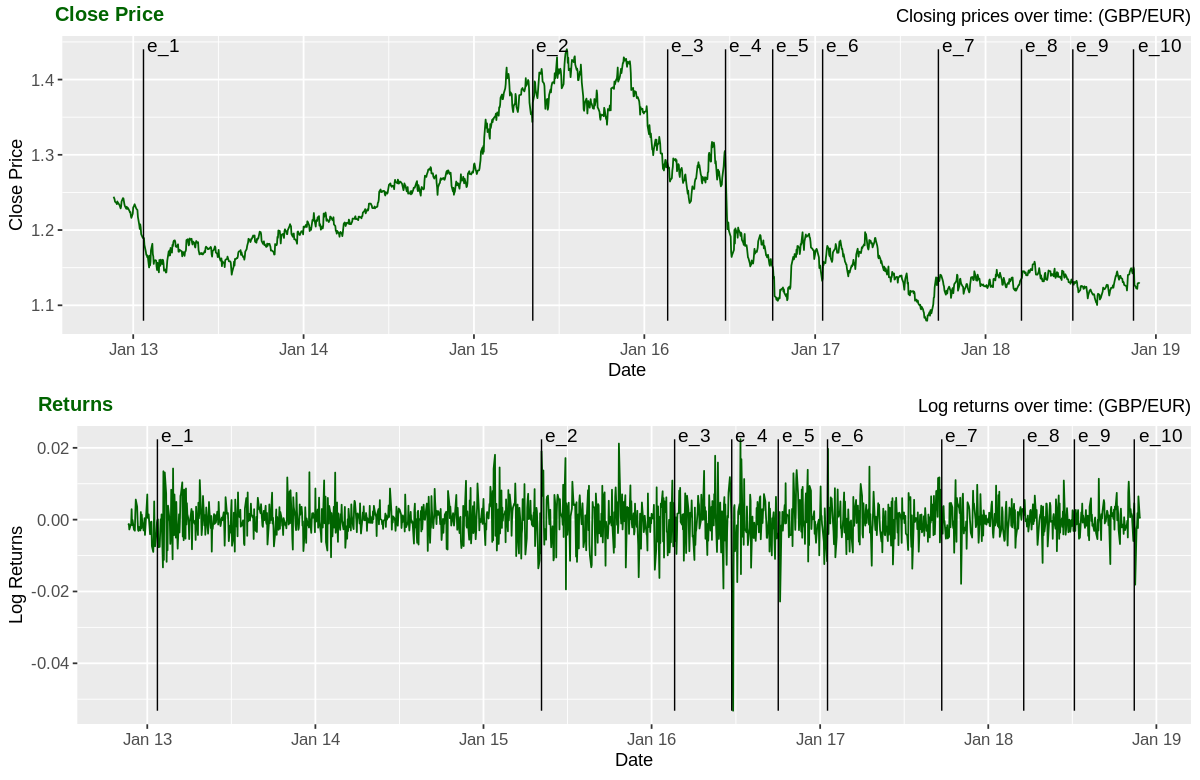

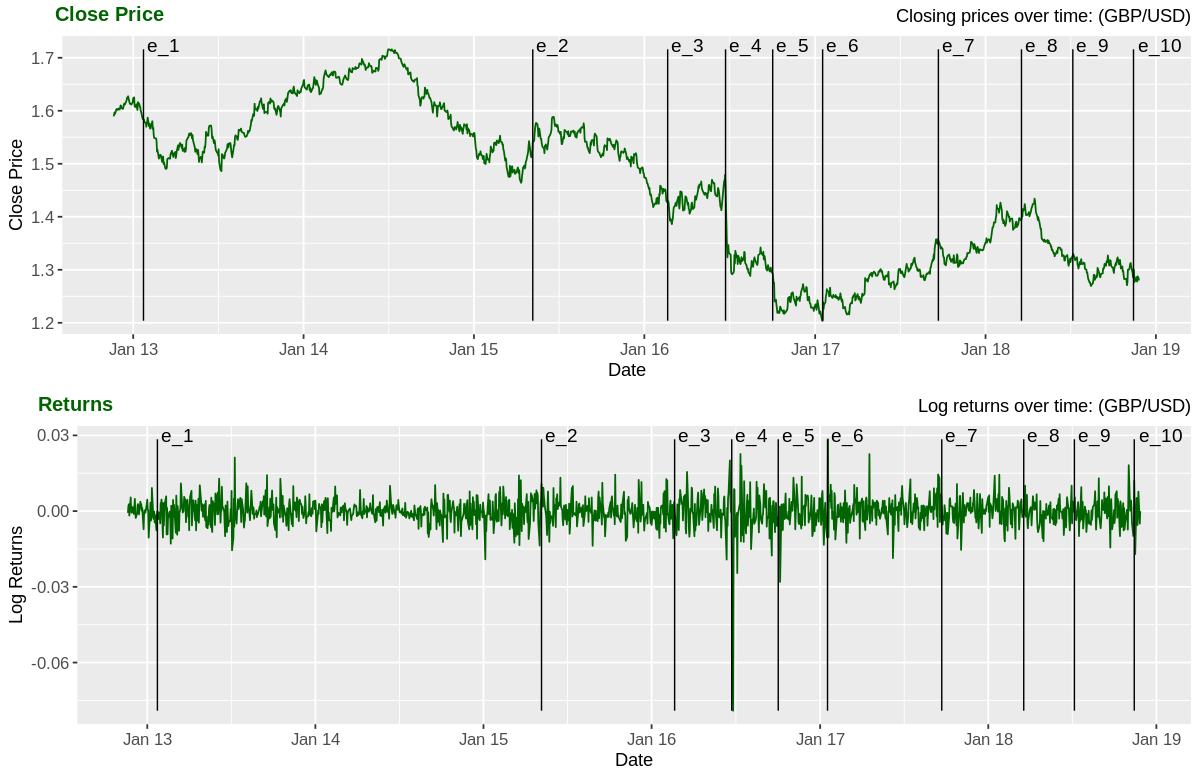

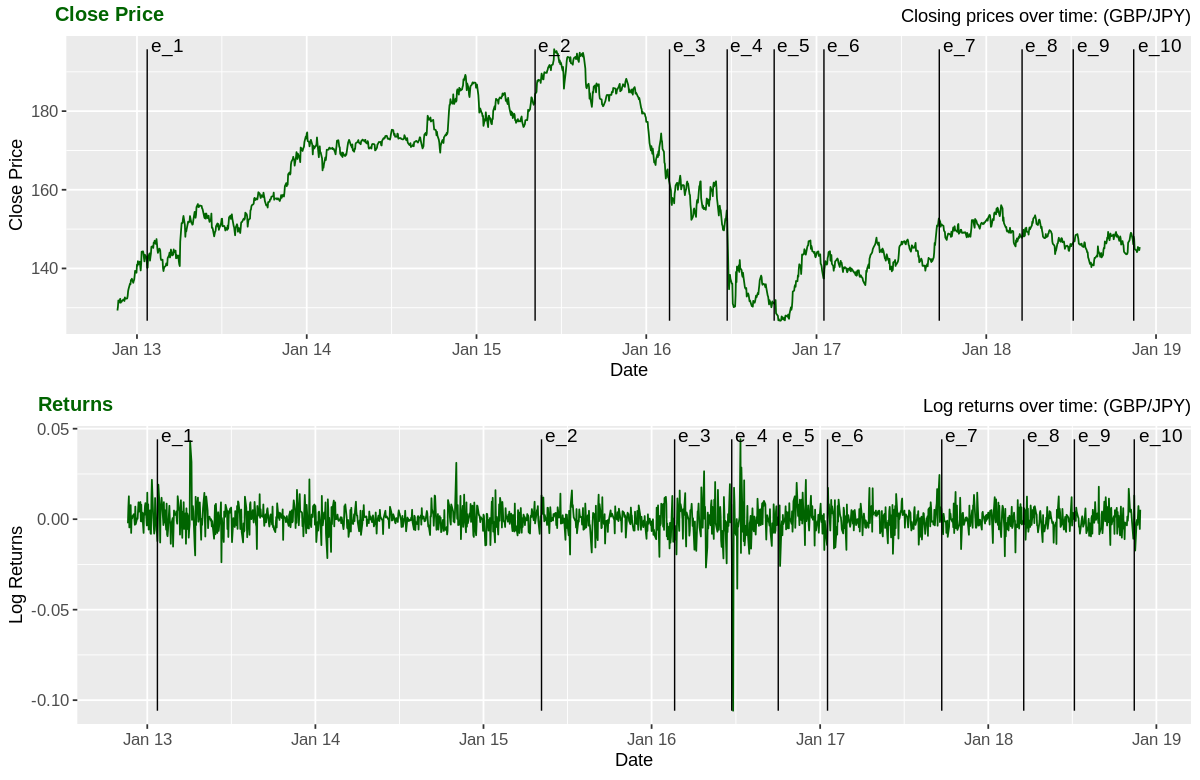

In [10]:
################################################################################################################
# FX MARKET - CLOSE PRICE & RETURNS PLOTS
################################################################################################################

################################################################################################################
# GBP/EUR Closing
plot.gbpeurclosing <- plot.financialevnts(df.fxratesf, 
                                          df.fxratesf$date, 
                                          df.fxratesf$GBPEUR,
                                          df.eventsf,
                                          c(min(df.fxratesf$date), max(df.fxratesf$date)),
                                          "Closing prices over time: (GBP/EUR)",
                                          "Date",
                                          "Close Price")
# GBP/EUR Returns
plot.gbpeurreturns <- plot.financialevnts(df.fxratesf, 
                                          df.fxratesf$date, 
                                          df.fxratesf$GBPEURLOG,
                                          df.eventsf,
                                          c(min(df.fxratesf$date), max(df.fxratesf$date)),
                                          "Log returns over time: (GBP/EUR)",
                                          "Date",
                                          "Log Returns")

# set size of plot and show and plot graphs for GBP/EUR
options(repr.plot.width=10, repr.plot.height=6.5)
plot.gbpeur <- ggarrange(
    plot.gbpeurclosing, 
    plot.gbpeurreturns,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    nrow = 2)
plot.gbpeur # show plot 

################################################################################################################
# GBP/USD Closing 
plot.gbpusdclosing <- plot.financialevnts(df.fxratesf, 
                                          df.fxratesf$date, 
                                          df.fxratesf$GBPUSD,
                                          df.eventsf,
                                          c(min(df.fxratesf$date), max(df.fxratesf$date)),
                                          "Closing prices over time: (GBP/USD)",
                                          "Date", 
                                          "Close Price")

# GBP/USD Returns
plot.gbpusdreturns <- plot.financialevnts(df.fxratesf, 
                                          df.fxratesf$date, 
                                          df.fxratesf$GBPUSDLOG,
                                          df.eventsf,
                                          c(min(df.fxratesf$date), max(df.fxratesf$date)),
                                          "Log returns over time: (GBP/USD)",
                                          "Date",
                                          "Log Returns")

# set size of plot and show and plot graphs for GBP/USD
options(repr.plot.width=10, repr.plot.height=6.5)
plot.gbpusd <- ggarrange(
    plot.gbpusdclosing, 
    plot.gbpusdreturns,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    nrow = 2)
plot.gbpusd # show plot 

################################################################################################################
# GBP/JPY Closing 
plot.gbpjpyclosing <- plot.financialevnts(df.fxratesf, 
                                          df.fxratesf$date, 
                                          df.fxratesf$GBPJPY,
                                          df.eventsf,
                                          c(min(df.fxratesf$date), max(df.fxratesf$date)),
                                          "Closing prices over time: (GBP/JPY)",
                                          "Date", 
                                          "Close Price")

# GBP/JPY Returns
plot.gbpjpyreturns <- plot.financialevnts(df.fxratesf, 
                                          df.fxratesf$date, 
                                          df.fxratesf$GBPJPYLOG,
                                          df.eventsf,
                                          c(min(df.fxratesf$date), max(df.fxratesf$date)),
                                          "Log returns over time: (GBP/JPY)",
                                          "Date",
                                          "Log Returns")

# set size of plot and show and plot graphs for GBP/JPY
options(repr.plot.width=10, repr.plot.height=6.5)
plot.gbpjpy <- ggarrange(
    plot.gbpjpyclosing, 
    plot.gbpjpyreturns,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    nrow = 2)
plot.gbpjpy # show plot 
################################################################################################################

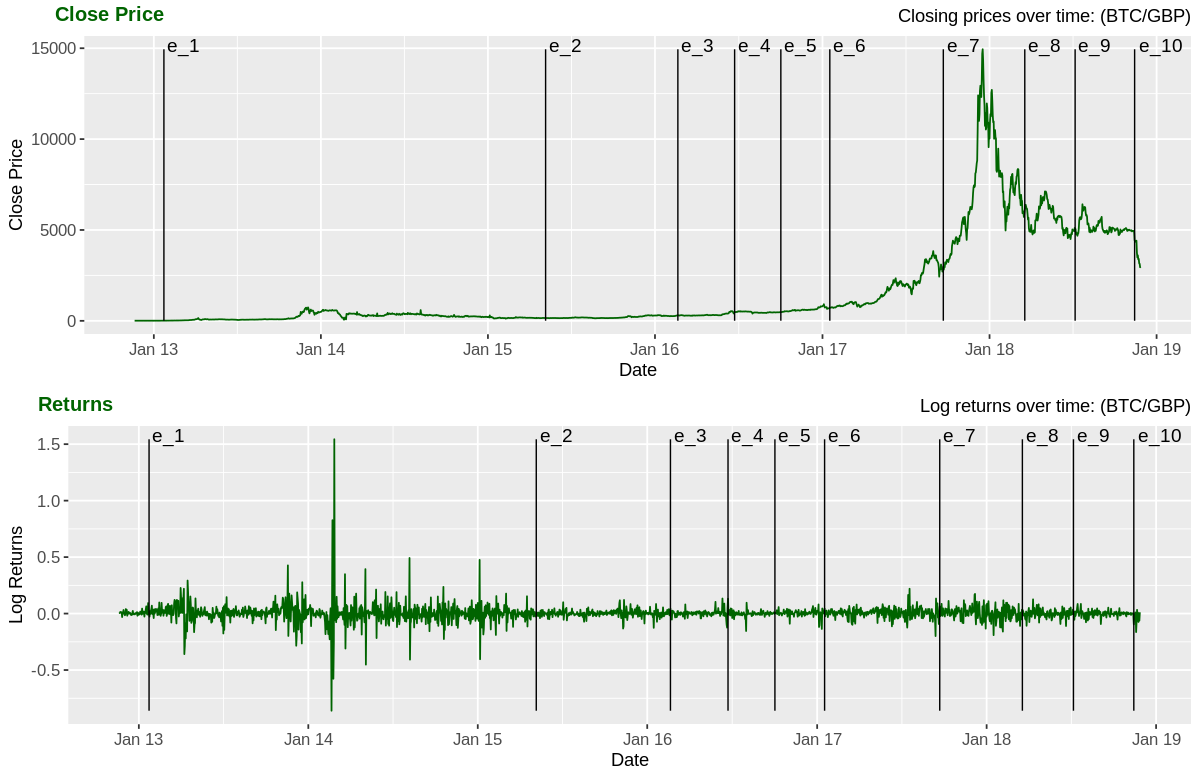

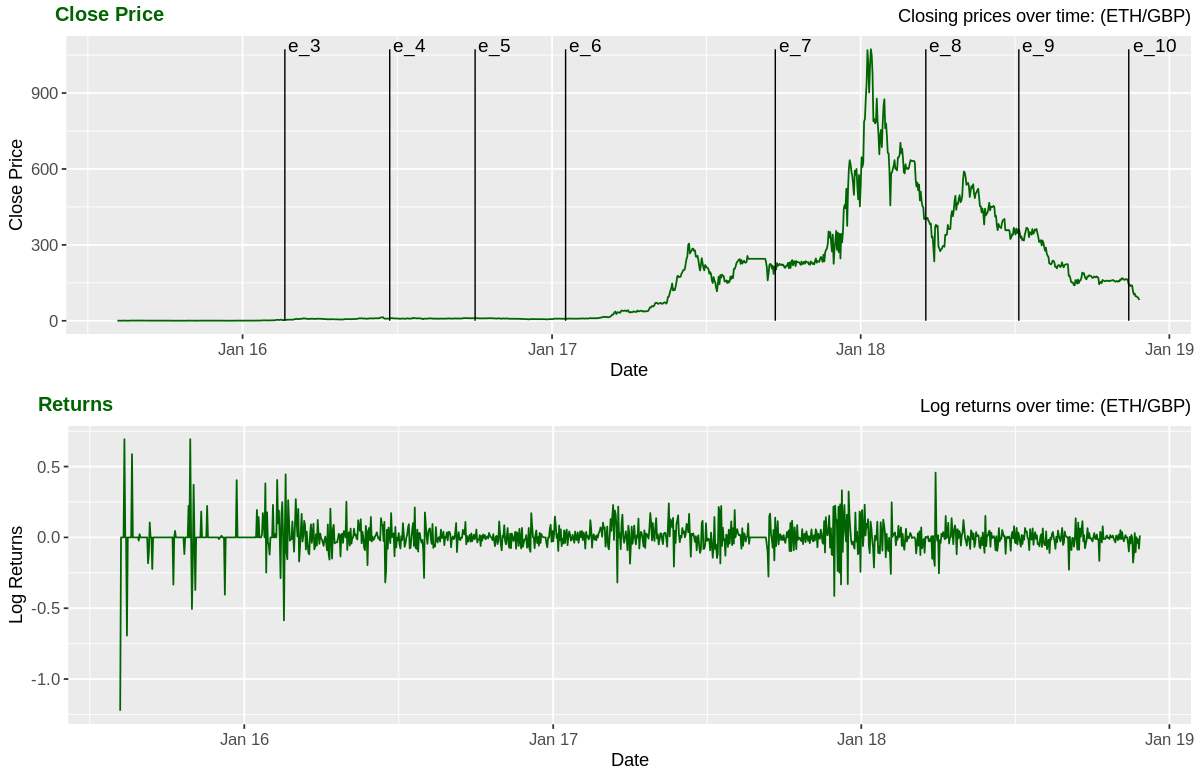

In [11]:
################################################################################################################
# CRYPTO MARKET - CLOSE PRICE & RETURNS PLOTS
################################################################################################################

################################################################################################################
# BTC/GBP Closing
plot.btcgbpclosing <- plot.financialevnts(df.btcgbpf, 
                                          df.btcgbpf$date, 
                                          df.btcgbpf$BTCGBP,
                                          df.eventsf,
                                          c(min(df.btcgbpf$date), max(df.btcgbpf$date)),
                                          "Closing prices over time: (BTC/GBP)",
                                          "Date",
                                          "Close Price")
# BTC/GBP Returns
plot.btcgbpreturns <- plot.financialevnts(df.btcgbpf, 
                                          df.btcgbpf$date, 
                                          df.btcgbpf$BTCGBPLOG,
                                          df.eventsf,
                                          c(min(df.btcgbpf$date), max(df.btcgbpf$date)),
                                          "Log returns over time: (BTC/GBP)",
                                          "Date",
                                          "Log Returns")

# set size of plot and show and plot graphs for BTC/GBP
options(repr.plot.width=10, repr.plot.height=6.5)
plot.btcgbp <- ggarrange(
    plot.btcgbpclosing, 
    plot.btcgbpreturns,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    nrow = 2)
plot.btcgbp # show plot 

################################################################################################################
# ETH/GBP Closing
plot.ethgbpclosing <- plot.financialevnts(df.ethgbpf, 
                                          df.ethgbpf$date, 
                                          df.ethgbpf$ETHGBP,
                                          df.eventsf,
                                          c(min(df.ethgbpf$date), max(df.ethgbpf$date)),
                                          "Closing prices over time: (ETH/GBP)",
                                          "Date",
                                          "Close Price")
# ETH/GBP Returns
plot.ethgbpreturns <- plot.financialevnts(df.ethgbpf, 
                                          df.ethgbpf$date, 
                                          df.ethgbpf$ETHGBPLOG,
                                          df.eventsf,
                                          c(min(df.ethgbpf$date), max(df.ethgbpf$date)),
                                          "Log returns over time: (ETH/GBP)",
                                          "Date",
                                          "Log Returns")

# set size of plot and show and plot graphs for ETH/GBP
options(repr.plot.width=10, repr.plot.height=6.5)
plot.ethgbp <- ggarrange(
    plot.ethgbpclosing, 
    plot.ethgbpreturns,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    nrow = 2)
plot.ethgbp # show plot 
################################################################################################################

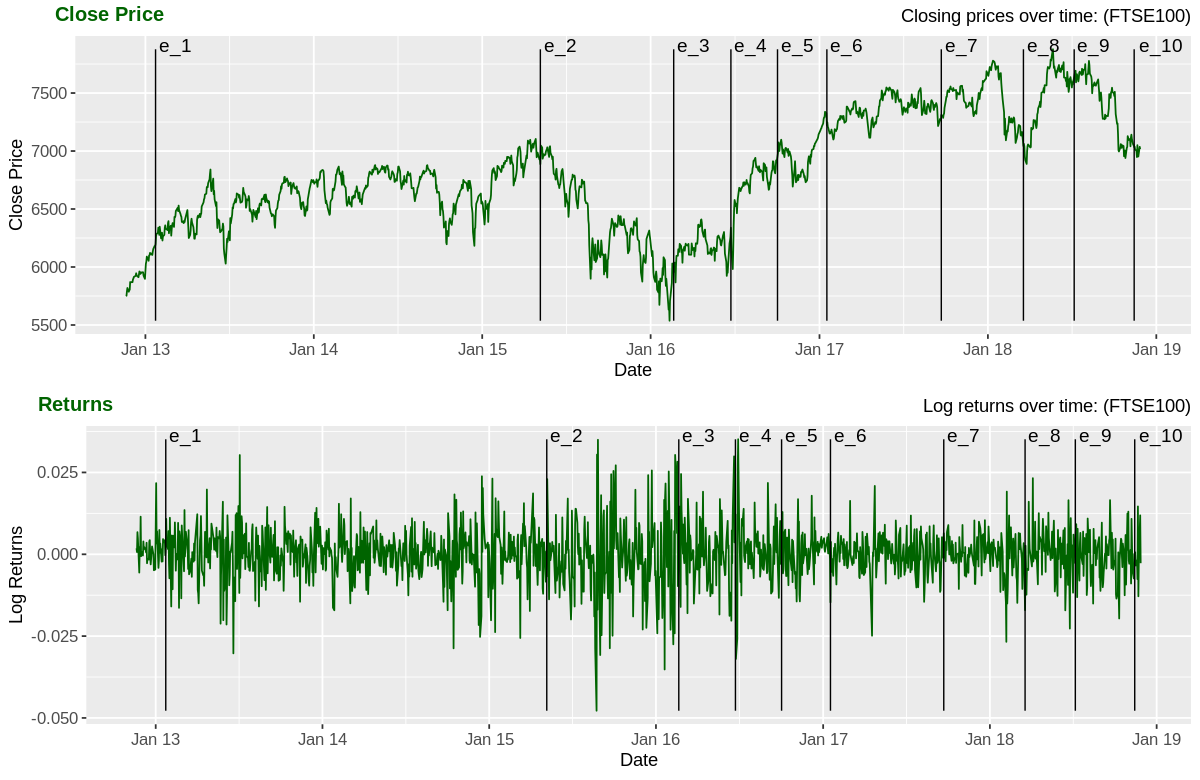

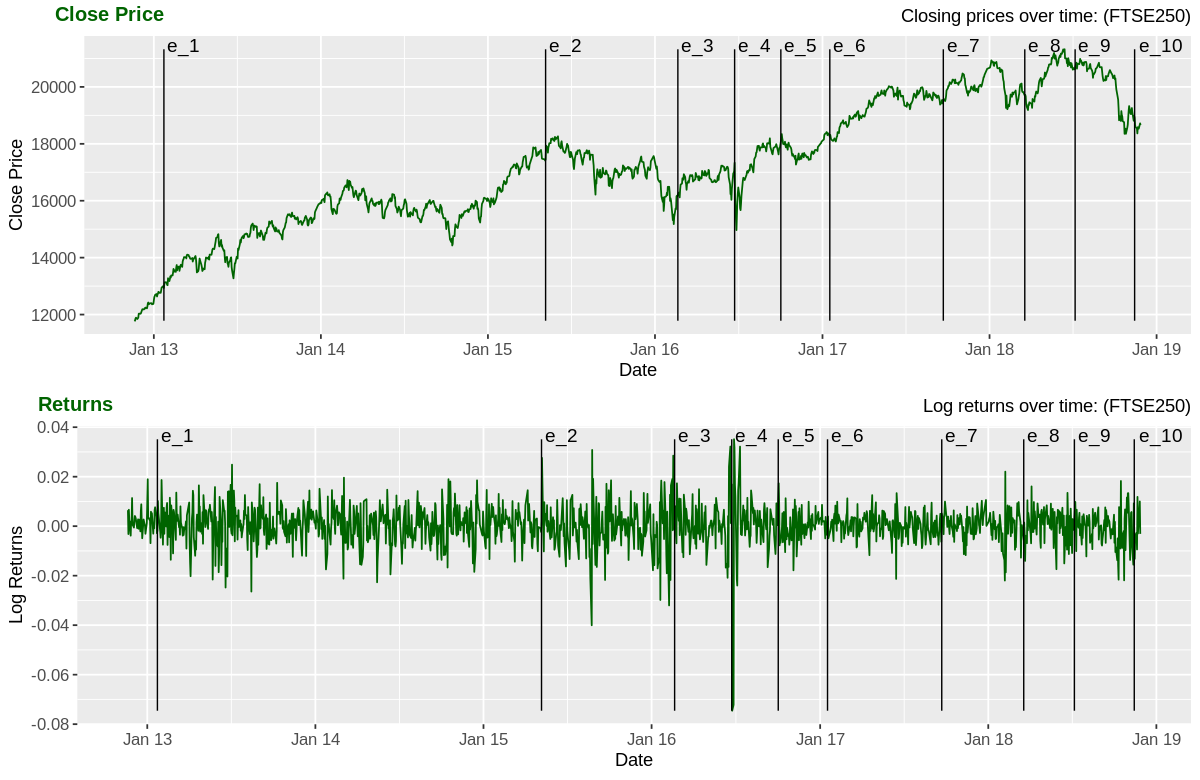

In [12]:
################################################################################################################
# EQUITY MARKET - CLOSE PRICE & RETURNS PLOTS
################################################################################################################

################################################################################################################
# FTSE100 Closing
plot.ftse100closing <- plot.financialevnts(df.ftse100f, 
                                           df.ftse100f$date, 
                                           df.ftse100f$FTSE100,
                                           df.eventsf,
                                           c(min(df.ftse100f$date), max(df.ftse100f$date)),
                                           "Closing prices over time: (FTSE100)",
                                           "Date",
                                           "Close Price")
# FTSE100 Returns
plot.ftse100returns <- plot.financialevnts(df.ftse100f, 
                                           df.ftse100f$date, 
                                           df.ftse100f$FTSE100LOG,
                                           df.eventsf,
                                           c(min(df.ftse100f$date), max(df.ftse100f$date)),
                                           "Log returns over time: (FTSE100)",
                                           "Date",
                                           "Log Returns")

# set size of plot and show and plot graphs for FTSE100
options(repr.plot.width=10, repr.plot.height=6.5)
plot.ftse100 <- ggarrange(
    plot.ftse100closing, 
    plot.ftse100returns,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    nrow = 2)
plot.ftse100 # show plot 

################################################################################################################
# FTSE250 Closing
plot.ftse250closing <- plot.financialevnts(df.ftse250f, 
                                           df.ftse250f$date, 
                                           df.ftse250f$FTSE250,
                                           df.eventsf,
                                           c(min(df.ftse250f$date), max(df.ftse250f$date)),
                                           "Closing prices over time: (FTSE250)",
                                           "Date",
                                           "Close Price")
# FTSE250 Returns
plot.ftse250returns <- plot.financialevnts(df.ftse250f, 
                                           df.ftse250f$date, 
                                           df.ftse250f$FTSE250LOG,
                                           df.eventsf,
                                           c(min(df.ftse250f$date), max(df.ftse250f$date)),
                                           "Log returns over time: (FTSE250)",
                                           "Date",
                                           "Log Returns")

# set size of plot and show and plot graphs for FTSE250
options(repr.plot.width=10, repr.plot.height=6.5)
plot.ftse250 <- ggarrange(
    plot.ftse250closing, 
    plot.ftse250returns,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    nrow = 2)
plot.ftse250 # show plot 
################################################################################################################

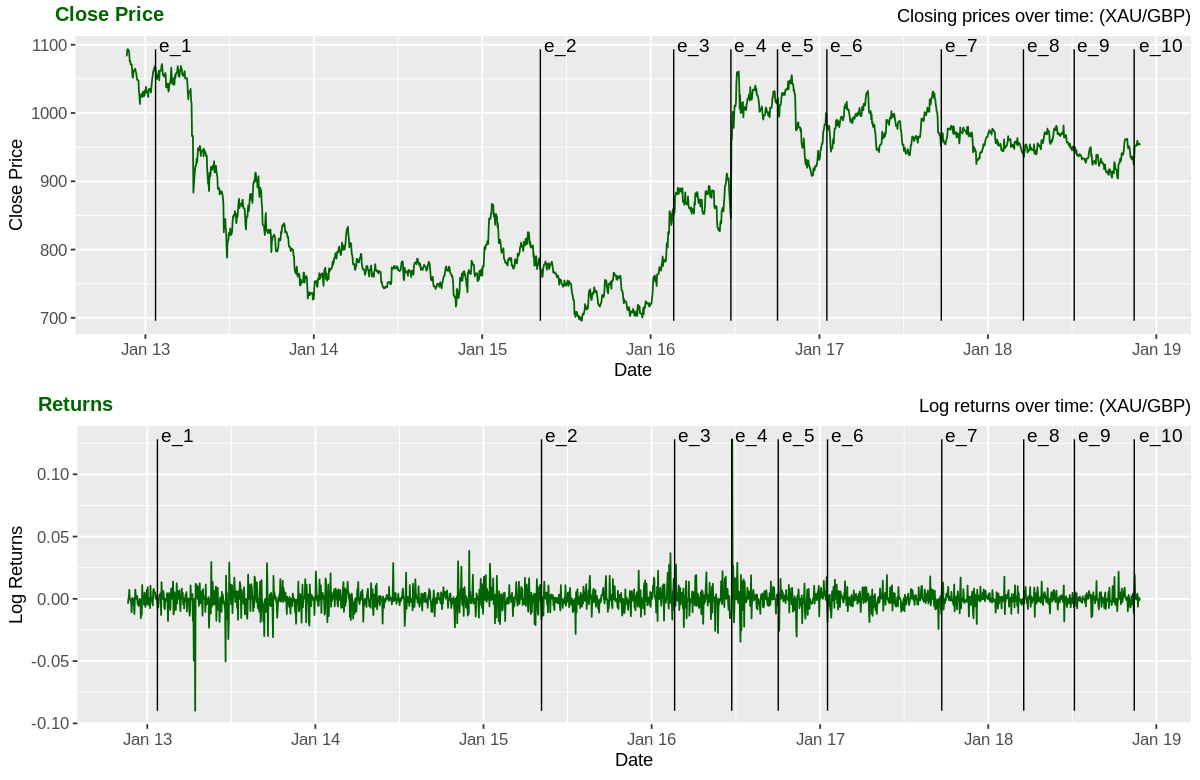

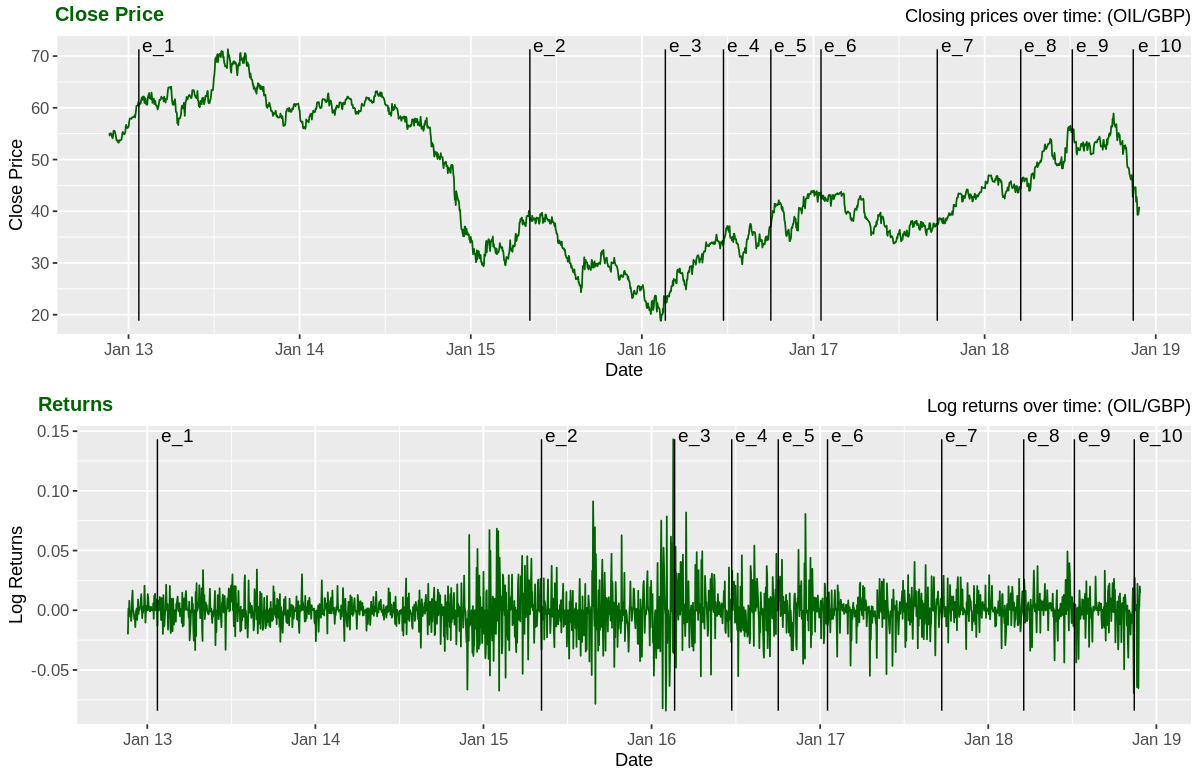

In [15]:
################################################################################################################
# COMMODITY MARKET - CLOSE PRICE & RETURNS PLOTS
################################################################################################################

################################################################################################################
# XAU/GBP Closing
plot.xaugbpclosing <- plot.financialevnts(df.goldf, 
                                          df.goldf$date, 
                                          df.goldf$XAUGBP,
                                          df.eventsf,
                                          c(min(df.goldf$date), max(df.goldf$date)),
                                          "Closing prices over time: (XAU/GBP)",
                                          "Date",
                                          "Close Price")
# XAU/GBP Returns
plot.xaugbpreturns <- plot.financialevnts(df.goldf, 
                                          df.goldf$date, 
                                          df.goldf$XAUGBPLOG,
                                          df.eventsf,
                                          c(min(df.goldf$date), max(df.goldf$date)),
                                          "Log returns over time: (XAU/GBP)",
                                          "Date",
                                          "Log Returns")

# set size of plot and show and plot graphs for XAU/GBP
options(repr.plot.width=10, repr.plot.height=6.5)
plot.xaugbp <- ggarrange(
    plot.xaugbpclosing, 
    plot.xaugbpreturns,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    nrow = 2)
plot.xaugbp # show plot 

################################################################################################################
# OIL/GBP Closing
plot.oilgbpclosing <- plot.financialevnts(df.oilf, 
                                          df.oilf$date, 
                                          df.oilf$OILGBP,
                                          df.eventsf,
                                          c(min(df.oilf$date), max(df.oilf$date)),
                                          "Closing prices over time: (OIL/GBP)",
                                          "Date",
                                          "Close Price")
# OIL/GBP Returns
plot.oilgbpreturns <- plot.financialevnts(df.oilf, 
                                          df.oilf$date, 
                                          df.oilf$OILGBPLOG,
                                          df.eventsf,
                                          c(min(df.oilf$date), max(df.oilf$date)),
                                          "Log returns over time: (OIL/GBP)",
                                          "Date",
                                          "Log Returns")

# set size of plot and show and plot graphs for XAU/GBP
options(repr.plot.width=10, repr.plot.height=6.5)
plot.oilgbp <- ggarrange(
    plot.oilgbpclosing, 
    plot.oilgbpreturns,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    nrow = 2)
plot.oilgbp # show plot 
################################################################################################################

In [31]:
################################################################################################################
# Plot probability distributions for financial assets. 
################################################################################################################

plot.probdist <- function (dataframe, x, title, xlab) {

    # generate plot from specified args 
    tmp.plot <- ggplot(dataframe, aes(x=x)) %>% 
                + geom_density(fill=NA, color = "darkgreen") %>%
                + xlab(xlab) %>%
                + ggtitle(title) %>%
                + theme(plot.title = element_text(hjust = 1, size=12, color = "black")) %>%
                + geom_vline(aes(xintercept=mean(x, na.rm=T)), 
                             color="red", 
                             linetype="dashed", size=1) 
    
    # return plot 
    return(tmp.plot)
}

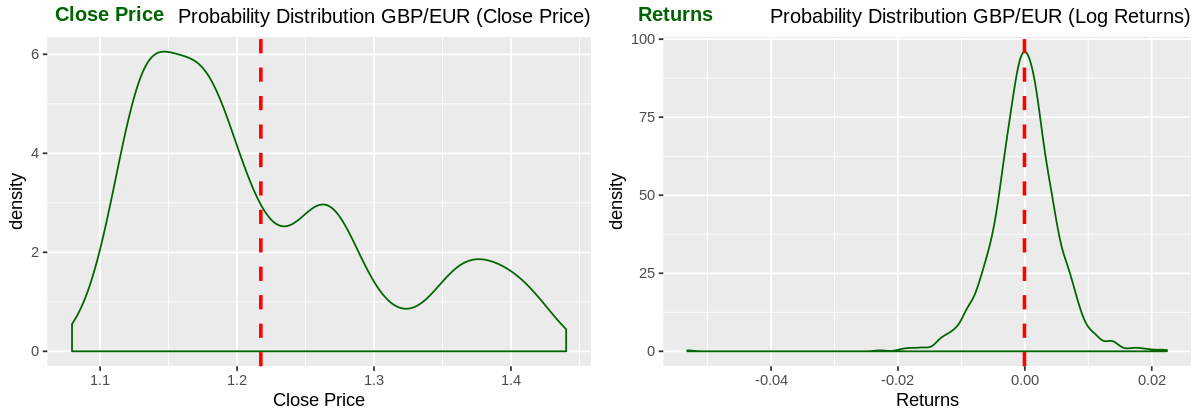

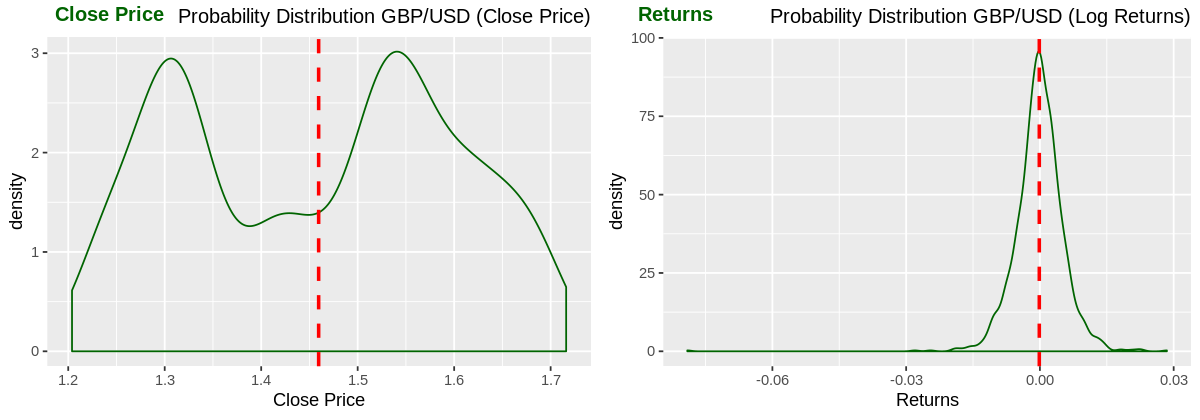

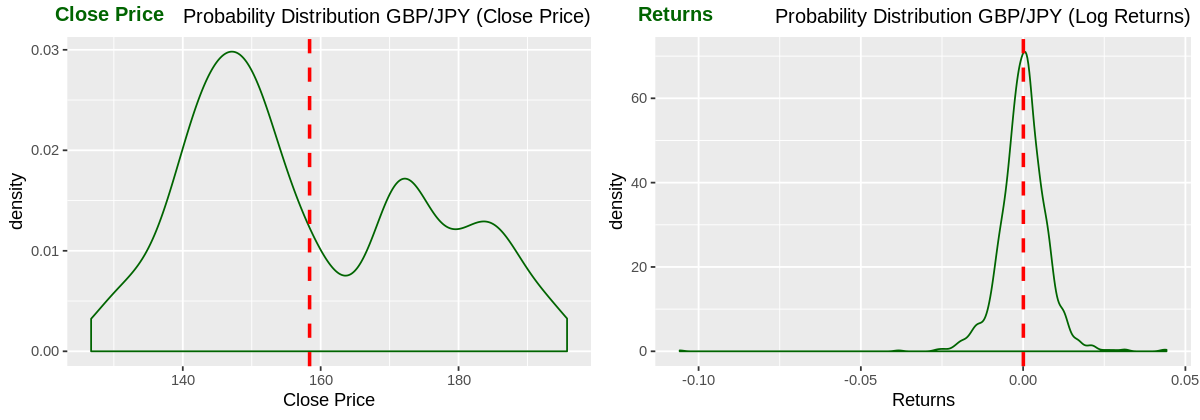

In [40]:
################################################################################################################
# FX MARKET - CLOSE PRICE & RETURNS PROBABILITY DISTRIBUTIONS
################################################################################################################

################################################################################################################
# GBP/EUR Closing
plot.gbpeurclosedist <- plot.probdist(df.fxratesf, 
                                      df.fxratesf$GBPEUR, 
                                      "Probability Distribution GBP/EUR (Close Price)", 
                                      "Close Price")

# GBP/EUR Returns
plot.gbpeurreturnsdist <- plot.probdist(df.fxratesf, 
                                        df.fxratesf$GBPEURLOG, 
                                        "Probability Distribution GBP/EUR (Log Returns)", 
                                        "Returns")

# set size of plot and show and plot graphs for GBP/EUR
options(repr.plot.width=10, repr.plot.height=3.5)
plot.gbpeurdist <- ggarrange(
    plot.gbpeurclosedist, 
    plot.gbpeurreturnsdist,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    ncol = 2)
plot.gbpeurdist # show plot 

################################################################################################################
# GBP/USD Closing
plot.gbpusdclosedist <- plot.probdist(df.fxratesf, 
                                      df.fxratesf$GBPUSD, 
                                      "Probability Distribution GBP/USD (Close Price)", 
                                      "Close Price")

# GBP/USD Returns
plot.gbpusdreturnsdist <- plot.probdist(df.fxratesf, 
                                        df.fxratesf$GBPUSDLOG, 
                                        "Probability Distribution GBP/USD (Log Returns)", 
                                        "Returns")

# set size of plot and show and plot graphs for GBP/USD
options(repr.plot.width=10, repr.plot.height=3.5)
plot.gbpusddist <- ggarrange(
    plot.gbpusdclosedist, 
    plot.gbpusdreturnsdist,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    ncol = 2)
plot.gbpusddist # show plot 

################################################################################################################
# GBP/JPY Closing
plot.gbpjpyclosedist <- plot.probdist(df.fxratesf, 
                                      df.fxratesf$GBPJPY, 
                                      "Probability Distribution GBP/JPY (Close Price)", 
                                      "Close Price")

# GBP/USD Returns
plot.gbpjpyreturnsdist <- plot.probdist(df.fxratesf, 
                                        df.fxratesf$GBPJPYLOG, 
                                        "Probability Distribution GBP/JPY (Log Returns)", 
                                        "Returns")

# set size of plot and show and plot graphs for GBP/JPY
options(repr.plot.width=10, repr.plot.height=3.5)
plot.gbpjpydist <- ggarrange(
    plot.gbpjpyclosedist, 
    plot.gbpjpyreturnsdist,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    ncol = 2)
plot.gbpjpydist # show plot 

################################################################################################################

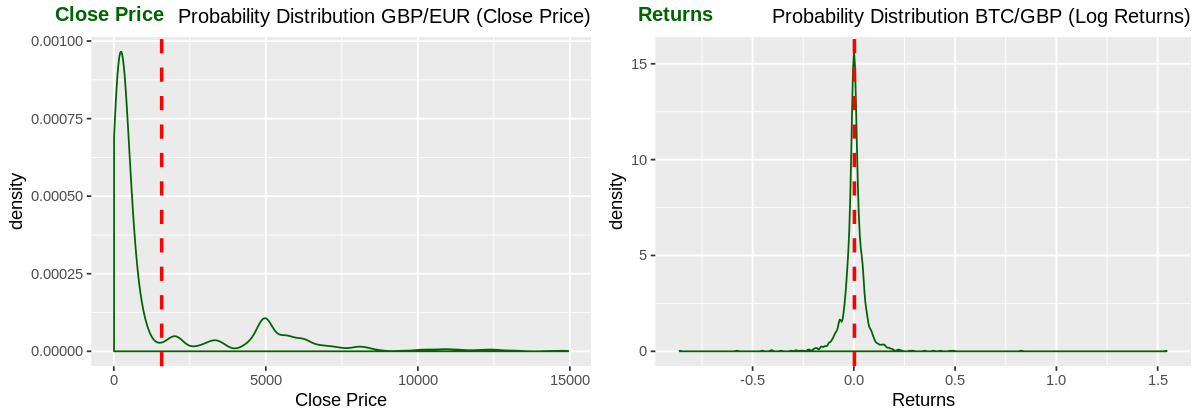

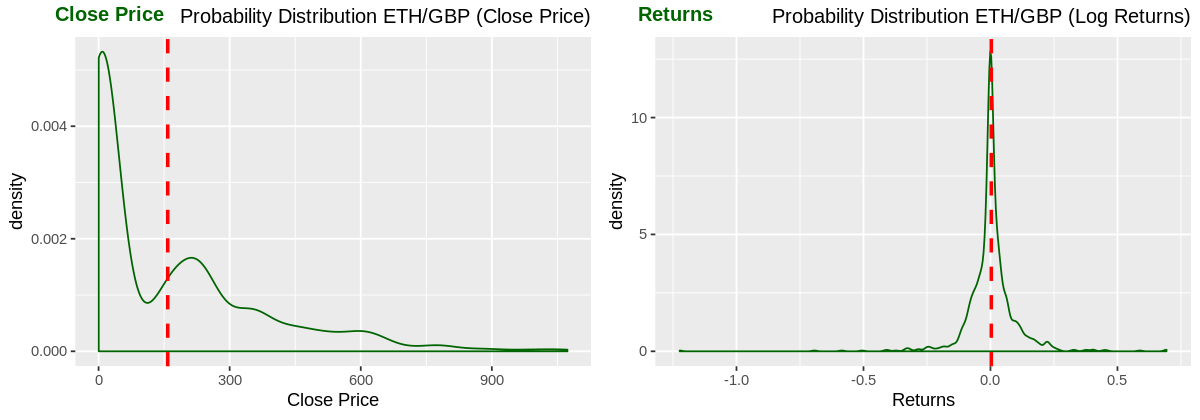

In [42]:
################################################################################################################
# CRYPTO MARKET - CLOSE PRICE & RETURNS PROBABILITY DISTRIBUTIONS
################################################################################################################

################################################################################################################
# BTC/GBP Closing
plot.btcgbpclosedist <- plot.probdist(df.btcgbpf, 
                                      df.btcgbpf$BTCGBP, 
                                      "Probability Distribution BTC/GBP (Close Price)", 
                                      "Close Price")

# GBP/GBP Returns
plot.btcgbpreturnsdist <- plot.probdist(df.btcgbpf, 
                                        df.btcgbpf$BTCGBPLOG, 
                                        "Probability Distribution BTC/GBP (Log Returns)", 
                                        "Returns")

# set size of plot and show and plot graphs for BTC/GBP
options(repr.plot.width=10, repr.plot.height=3.5)
plot.btcgbpdist <- ggarrange(
    plot.btcgbpclosedist, 
    plot.btcgbpreturnsdist,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    ncol = 2)
plot.btcgbpdist # show plot 

################################################################################################################
# ETH/GBP Closing
plot.ethgbpclosedist <- plot.probdist(df.ethgbpf, 
                                      df.ethgbpf$ETHGBP, 
                                      "Probability Distribution ETH/GBP (Close Price)", 
                                      "Close Price")

# ETH/GBP Returns
plot.ethgbpreturnsdist <- plot.probdist(df.ethgbpf, 
                                        df.ethgbpf$ETHGBPLOG, 
                                        "Probability Distribution ETH/GBP (Log Returns)", 
                                        "Returns")

# set size of plot and show and plot graphs for ETH/GBP
options(repr.plot.width=10, repr.plot.height=3.5)
plot.ethgbpdist <- ggarrange(
    plot.ethgbpclosedist, 
    plot.ethgbpreturnsdist,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    ncol = 2)
plot.ethgbpdist # show plot 

################################################################################################################

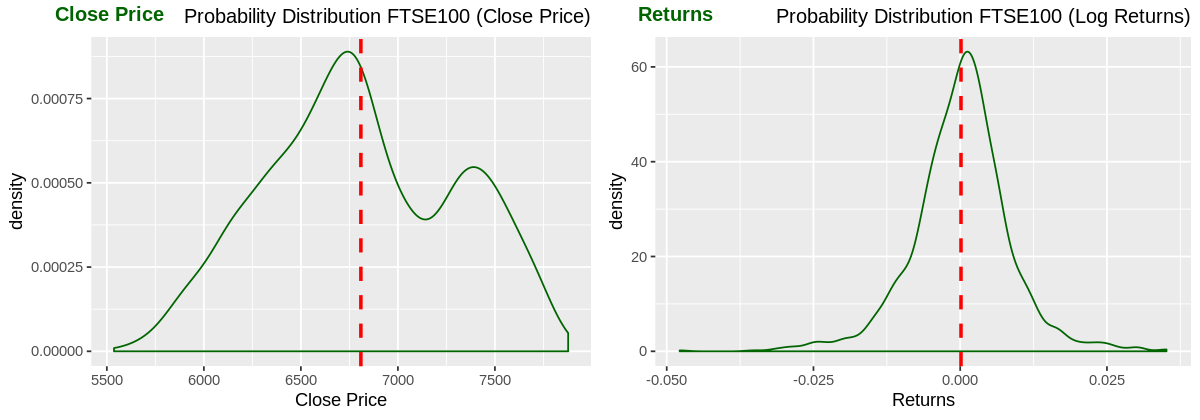

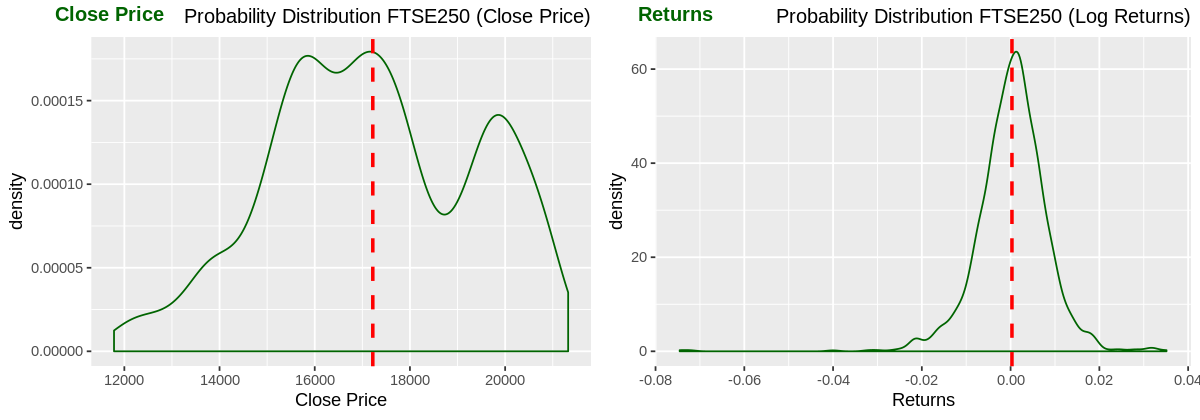

In [45]:
################################################################################################################
# EQUITY MARKET - CLOSE PRICE & RETURNS PLOTS PROBABILITY DISTRIBUTIONS
################################################################################################################

################################################################################################################
# FTSE100 Closing
plot.ftse100closedist <- plot.probdist(df.ftse100f, 
                                       df.ftse100f$FTSE100, 
                                       "Probability Distribution FTSE100 (Close Price)", 
                                       "Close Price")

# FTSE100 Returns
plot.ftse100returnsdist <- plot.probdist(df.ftse100f, 
                                         df.ftse100f$FTSE100LOG, 
                                         "Probability Distribution FTSE100 (Log Returns)", 
                                         "Returns")

# set size of plot and show and plot graphs for FTSE100
options(repr.plot.width=10, repr.plot.height=3.5)
plot.ftse100dist <- ggarrange(
    plot.ftse100closedist, 
    plot.ftse100returnsdist,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    ncol = 2)
plot.ftse100dist # show plot 

################################################################################################################
# FTSE250 Closing
plot.ftse250closedist <- plot.probdist(df.ftse250f, 
                                       df.ftse250f$FTSE250, 
                                       "Probability Distribution FTSE250 (Close Price)", 
                                       "Close Price")

# FTSE250 Returns
plot.ftse250returnsdist <- plot.probdist(df.ftse250f, 
                                         df.ftse250f$FTSE250LOG, 
                                         "Probability Distribution FTSE250 (Log Returns)", 
                                         "Returns")

# set size of plot and show and plot graphs for FTSE250
options(repr.plot.width=10, repr.plot.height=3.5)
plot.ftse250dist <- ggarrange(
    plot.ftse250closedist, 
    plot.ftse250returnsdist,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    ncol = 2)
plot.ftse250dist # show plot 
################################################################################################################

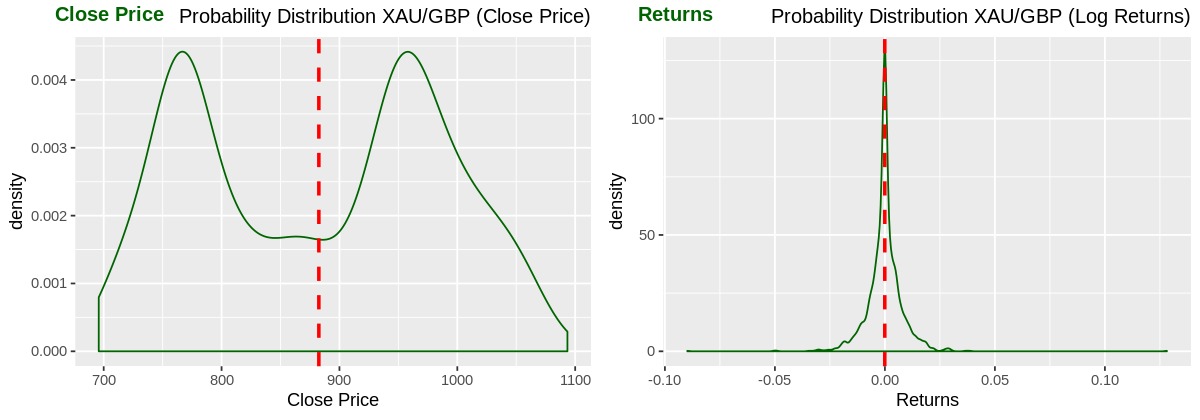

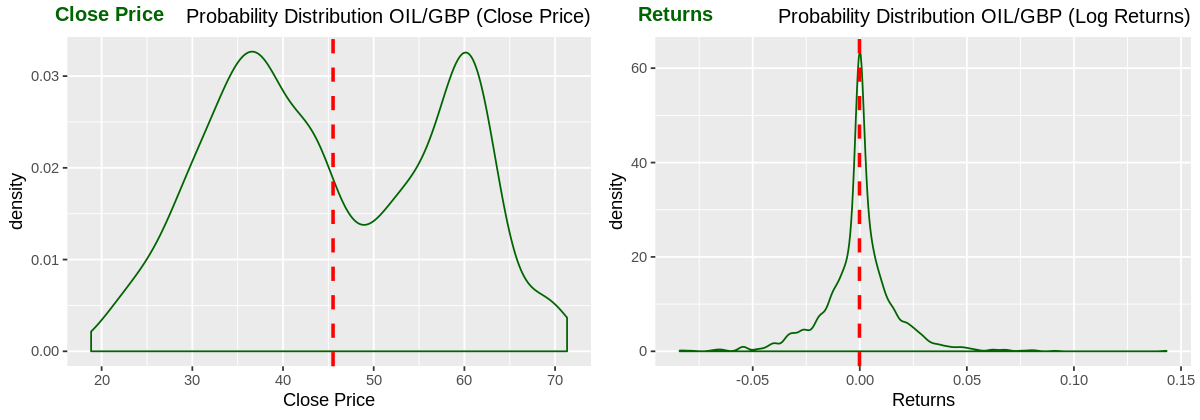

In [47]:
################################################################################################################
# COMMODITY MARKET - CLOSE PRICE & RETURNS PLOTS PROBABILITY DISTRIBUTIONS
################################################################################################################

################################################################################################################
# XAU/GBP Closing
plot.xaugbpclosedist <- plot.probdist(df.goldf, 
                                      df.goldf$XAUGBP, 
                                      "Probability Distribution XAU/GBP (Close Price)", 
                                      "Close Price")

# XAU/GBP Returns
plot.xaugbpreturnsdist <- plot.probdist(df.goldf, 
                                        df.goldf$XAUGBPLOG, 
                                        "Probability Distribution XAU/GBP (Log Returns)", 
                                        "Returns")

# set size of plot and show and plot graphs for XAU/GBP
options(repr.plot.width=10, repr.plot.height=3.5)
plot.xaugbpdist <- ggarrange(
    plot.xaugbpclosedist, 
    plot.xaugbpreturnsdist,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    ncol = 2)
plot.xaugbpdist # show plot 

################################################################################################################

# OIL/GBP Closing
plot.oilgbpclosedist <- plot.probdist(df.oilf, 
                                      df.oilf$OILGBP, 
                                      "Probability Distribution OIL/GBP (Close Price)", 
                                      "Close Price")

# OIL/GBP Returns
plot.oilgbpreturnsdist <- plot.probdist(df.oilf, 
                                        df.oilf$OILGBPLOG, 
                                        "Probability Distribution OIL/GBP (Log Returns)", 
                                        "Returns")

# set size of plot and show and plot graphs for XAU/GBP
options(repr.plot.width=10, repr.plot.height=3.5)
plot.oilgbpdist <- ggarrange(
    plot.oilgbpclosedist, 
    plot.oilgbpreturnsdist,
    labels = c("Close Price", "Returns"),
    font.label = list(size = 12, color = "darkgreen", family = NULL),
    ncol = 2)
plot.oilgbpdist # show plot 

################################################################################################################

## Hypothesis Testing 

<i>Null Hypothesis</i>
- $H_0$: There is no significant difference between the abnormal mean returns before a major brexit event and after it. (${\mu_0 = \mu_1}$)

<i>Alternative Hypothesis</i>

- $H_1$: There is a significant difference between the abnormal mean returns before a major brexit event and after it. (${\mu_0 \neq \mu_1}$) 

<hr>

<i>Null Hypothesis</i>
- $H_0$: There is no abnormal returns around the event date. (${AR_{i,t} = 0}$)

<i>Alternative Hypothesis</i>

- $H_1$: There is abnormal returns around the event date. (${AR_{i,t} = 0}$)

### First Hypothesis


### Second Hypothesis
